In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [7]:
#Study CSV Files
sugar_path = "Resources/sugar_per_person_g_per_day-FAO.csv"
badteeth_path = "Resources/badteeth per child age 12 - WHO.csv"

#Read CSV Files
sugar_data = pd.read_csv(sugar_path)
badteeth_data = pd.read_csv(badteeth_path)

#Need to get correlation for Year 2004.  Bad Teeth only has data for 2004.  Need to filter for GNI Data.
sugar_2004 = pd.DataFrame(sugar_data,columns = ['Country', '2004'])

#Merge 2004 Data
sugar_badteeth_2004 = pd.merge(sugar_2004, badteeth_data, on="Country", how = "inner")
sugar_badteeth_2004

sugar_badteeth_2004= sugar_badteeth_2004.rename(columns={'2004_x': 'Sugar Consumption (g per day)',
                                                         '2004_y': 'Bad Teeth (per child)',
                                                        })
sugar_badteeth_2004

,Country,Sugar Consumption (g per day),Bad Teeth (per child)
0,Afghanistan,15.5,2.90
1,Albania,55.0,3.02
2,Algeria,84.3,2.30
3,Angola,39.3,1.70
4,Antigua and Barbuda,93.1,0.70
...,...,...,...
140,Vanuatu,43.5,1.20
141,Venezuela,105.0,2.10
142,Vietnam,37.9,1.90
143,Zambia,31.9,2.30


In [8]:
#Export to CSV
sugar_badteeth_2004.to_csv("sugar_badteeth_2004.csv")


The correlation coefficient between bad teeth vs sugar consumption is 0.14
slope = 0.003518, intercept = 1.67, r-value = 0.14, p-value = 0.1, standard error = 0.0


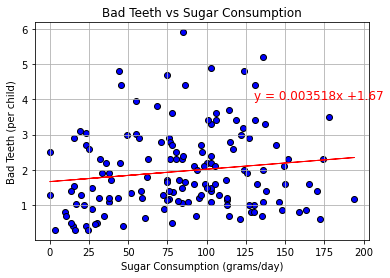

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(sugar_badteeth_2004.iloc[:,1], sugar_badteeth_2004.iloc[:,2], marker="o", facecolors="blue", edgecolors="black")

# Formatting the scatter diagram with title, x & y labels, and x & y limits
plt.title ("Bad Teeth vs Sugar Consumption")
plt.xlabel("Sugar Consumption (grams/day)")
plt.ylabel("Bad Teeth (per child)")
plt.grid()


(slope, intercept, rvalue, pvalue, stderr) = linregress(sugar_badteeth_2004.iloc[:,1], sugar_badteeth_2004.iloc[:,2])
# Output of correlation coefficient and linear regression model
print(f"The correlation coefficient between bad teeth vs sugar consumption is {round(rvalue,2)}")
print(f"slope = {round(slope,6)}, intercept = {round(intercept,2)}, r-value = {round(rvalue, 2)}, p-value = {round(pvalue,2)}, standard error = {round(stderr,2)}")

# Calculate the values for the regression line (y=mx+b)
best_fit = slope * sugar_badteeth_2004.iloc[:,1] + intercept

# Format the regression line formula to be displayed on the graph
best_fit_equation = "y = " + str(round(slope, 6)) + "x +" + str(round(intercept, 2))

# Plot regression line
plt.plot(sugar_badteeth_2004.iloc[:,1],best_fit,linewidth = 1,color="red")
# Plot regression formula on graph
plt.annotate(best_fit_equation, (130, 4), fontsize=12, color='red')

plt.show()